# Sales Prediction


(Simple Linear Regression)

# Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

# Data

Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

# Reading and Understanding the Data

In [1]:
#supress warning
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:

advertising = pd.DataFrame(pd.read_csv(r'C:\Users\HP\Downloads\advertising.csv'))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Data Inspection

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data cleaning

In [6]:
#checking null value
advertising.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

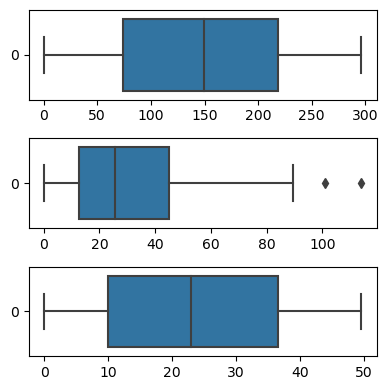

In [7]:
#outlier analysis
fig, axs = plt.subplots(3, figsize = (4,4))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0],orient="h")
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1],orient="h")
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2],orient="h")
plt.tight_layout()



# Outlier treatment

In [8]:
percentile25 = advertising['Newspaper'].quantile(0.25)
percentile75 = advertising['Newspaper'].quantile(0.75)

In [9]:
IQR = percentile75 - percentile25

In [10]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [11]:
#Detecting the outliers
advertising[advertising['Newspaper'] > upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [12]:
advertising[advertising['Newspaper'] < lower_limit]

,TV,Radio,Newspaper,Sales


In [13]:
#There are two outliers which can be dropped
advertising = advertising[advertising['Newspaper'] < upper_limit]
advertising.shape

(198, 4)

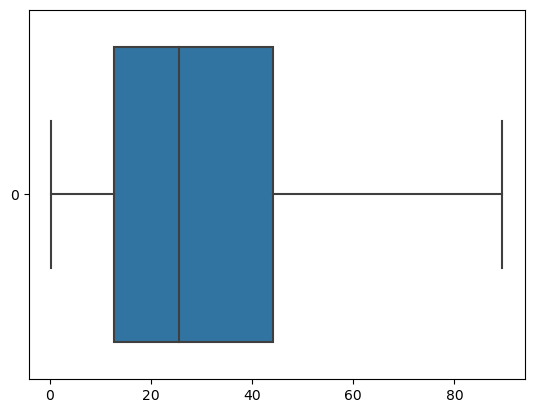

In [14]:
plt2 = sns.boxplot(advertising['Newspaper'],orient ="h")
#Outliers Removed

# Exploratory Data Analysis


Univariate Analysis


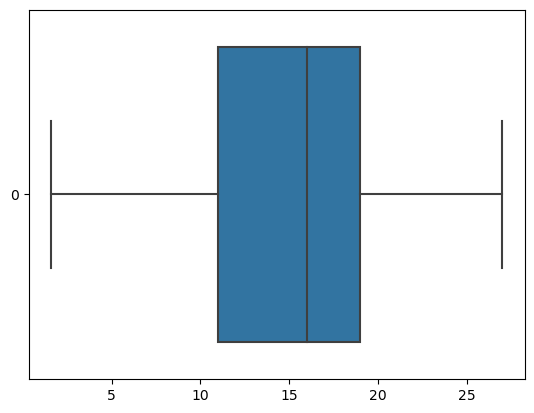

In [15]:
sns.boxplot(advertising['Sales'],orient = "h")
plt.show()

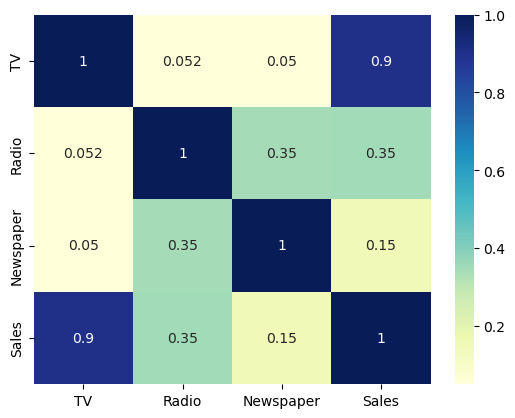

In [16]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

# Model Building

# Performing Simple Linear Regression

Equation of linear regression


y= c+m1*x1+m2*x2+m3*x3

y is the response
c is the intercept
m1 is the coefficient for the first feature
mn is the coefficient for the nth feature

In our case:

y = c + m1*TV
The values m1 are called the model coefficients or model parameters.

# Generic Steps in model building using statsmodels

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y

In [17]:
X = advertising['TV']
y = advertising['Sales']

# Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
# Let's now take a look at the train dataset

X_train.head()

75      16.9
3      151.5
185    205.0
27     240.1
91      28.6
Name: TV, dtype: float64

In [20]:
y_train.head()

75      8.7
3      16.5
185    22.6
27     20.9
91      7.3
Name: Sales, dtype: float64

In [21]:
X_test.head()

128    220.3
106     25.0
100    222.4
93     250.9
113    209.6
Name: TV, dtype: float64

y_test.head()

# Building a Linear Model

You first need to import the statsmodel.api library using which you'll perform the linear regression

In [22]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [23]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [24]:
X_train_sm.head()

,const,TV
75,1.0,16.9
3,1.0,151.5
185,1.0,205.0
27,1.0,240.1
91,1.0,28.6


In [25]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.065086
TV       0.053974
dtype: float64

In [26]:
 # Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     549.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.35e-49
Time:                        17:36:22   Log-Likelihood:                -310.15
No. Observations:                 138   AIC:                             624.3
Df Residuals:                     136   BIC:                             630.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0651      0.402     17.554      0.0

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

Looking at some key statistics from the summary

The values we are concerned with are -


     1. The coefficients and significance (p-values)
      2. R-squared
      3. F statistic and its significance



1. The coefficient for TV is 0.054, with a very low p value

    The coefficient is statistically significant. So the association is not purely by chance.


2. R - squared is 0.816

Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.


3. F statistic has a very low p value (practically low)

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.


The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales = 6.948 +0.054xTV

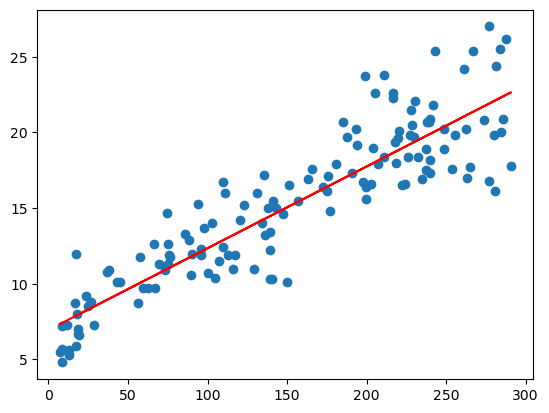

In [27]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Model Evaluation

# Residual analysis

To validate assumptions of the model, and hence the reliability for inference

# Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [28]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

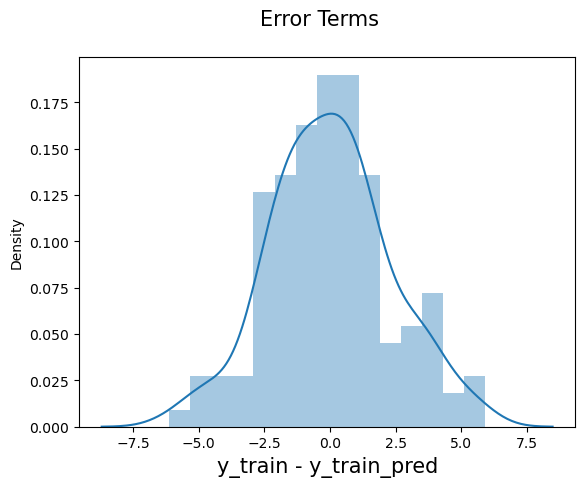

In [29]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good

# Looking for patterns in the residuals

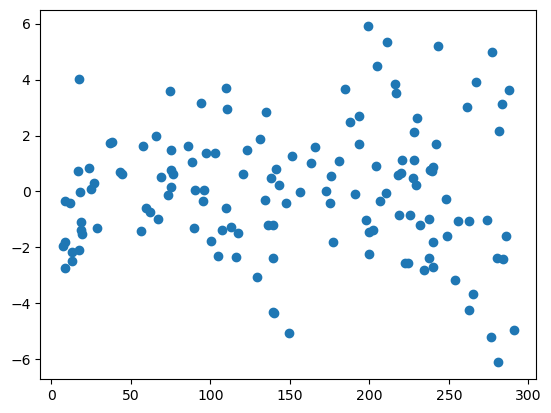

In [30]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

# Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [31]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [32]:
y_pred.head()

128    18.955535
106     8.414434
100    19.068880
93     20.607136
113    18.378015
dtype: float64

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Looking at the RMSE

In [34]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.3194524291283725


Checking the R-squared on the test set


In [35]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8217200792673927


Visualizing the fit on the test set


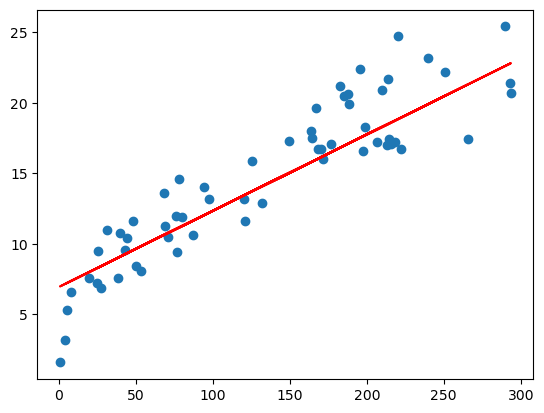

In [36]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [37]:
#Model With the Second variable 
X2 = advertising[['TV',"Radio"]]
y2 = advertising['Sales']

In [38]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size = 0.7, test_size = 0.3, random_state = 100)





In [39]:


X_train2.head()



,TV,Radio
75,16.9,43.7
3,151.5,41.3
185,205.0,45.1
27,240.1,16.7
91,28.6,1.5


In [40]:
y_train2.head()

75      8.7
3      16.5
185    22.6
27     20.9
91      7.3
Name: Sales, dtype: float64

In [41]:
# Add a constant to get an intercept
X_train_sm2 = sm.add_constant(X_train2)

# Fit the resgression line using 'OLS'
lr2 = sm.OLS(y_train2, X_train_sm2).fit()

In [42]:
lr2.params

const    4.433206
TV       0.053632
Radio    0.118743
dtype: float64

In [43]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     762.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.84e-74
Time:                        17:36:23   Log-Likelihood:                -248.61
No. Observations:                 138   AIC:                             503.2
Df Residuals:                     135   BIC:                             512.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4332      0.320     13.845      0.0

In [44]:
X_test_sm = sm.add_constant(X_test2)

# Predict the y values corresponding to X_test_sm
y_pred = lr2.predict(X_test_sm)

In [45]:
r_squared = r2_score(y_test2, y_pred)
r_squared

0.8613917235700398

# with noramlization

In [46]:
df_train, df_test = train_test_split(advertising, train_size=0.7, random_state=20)
print(df_train.shape)
print(df_test.shape)

(138, 4)
(60, 4)


In [47]:
df_train.head()

,TV,Radio,Newspaper,Sales
22,13.2,15.9,49.6,5.6
46,89.7,9.9,35.7,10.6
149,44.7,25.8,20.6,10.1
126,7.8,38.9,50.6,6.6
91,28.6,1.5,33.0,7.3


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # instance of the MinMaxScaler

# numerical variables to scale:
num_vars = ['TV',"Radio", "Newspaper" ,"Sales"]


# scaling the num vars of the training data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,TV,Radio,Newspaper,Sales
22,0.018894,0.320565,0.553311,0.038647
46,0.286564,0.199597,0.397306,0.280193
149,0.129111,0.520161,0.227834,0.256039
126,0.000000,0.784274,0.564534,0.086957
91,0.072778,0.030242,0.367003,0.120773


In [49]:
y_train = df_train.pop('Sales')
X_train = df_train[["TV","Radio"]]



In [50]:
y_train.head()

22     0.038647
46     0.280193
149    0.256039
126    0.086957
91     0.120773
Name: Sales, dtype: float64

In [51]:
X_train.head()

,TV,Radio
22,0.018894,0.320565
46,0.286564,0.199597
149,0.129111,0.520161
126,0.000000,0.784274
91,0.072778,0.030242


In [52]:
# Add a constant to get an intercept
X_train_sm_2 = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr3 = sm.OLS(y_train, X_train_sm_2).fit()





In [53]:
X_train_sm_2

,const,TV,Radio
22,1.0,0.018894,0.320565
46,1.0,0.286564,0.199597
149,1.0,0.129111,0.520161
126,1.0,0.000000,0.784274
91,1.0,0.072778,0.030242
...,...,...,...
150,1.0,0.954864,0.280242
139,1.0,0.619664,0.885081
158,1.0,0.013646,0.743952
15,1.0,0.656403,0.961694


In [54]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     600.2
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           6.58e-68
Time:                        17:36:23   Log-Likelihood:                 160.67
No. Observations:                 138   AIC:                            -315.3
Df Residuals:                     135   BIC:                            -306.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0275      0.016      1.731      0.0

In [55]:
# numerical variables to scale:
num_vars = ['TV',"Radio", "Newspaper" ,"Sales"]


# scaling the num vars of the test data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,TV,Radio,Newspaper,Sales
108,0.018544,0.008065,0.283951,0.024155
29,0.219734,0.322581,0.454545,0.275362
13,0.313856,0.153226,0.077441,0.429952
52,0.729881,0.840726,0.441077,0.859903
192,0.032890,0.082661,0.351291,0.053140


In [56]:
#Predictions on test set
y_test = df_test.pop('Sales')
X_test = df_test[["TV","Radio"]]

In [57]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr3.predict(X_test_sm)

In [58]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8992834675806994

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TV,2.25
1,Radio,2.25


# Model With Three variables

In [60]:
#without Scaling the variables
X4 = advertising[['TV',"Radio","Newspaper"]]
y4 = advertising['Sales']

In [61]:


from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train4.head()



,TV,Radio,Newspaper
75,16.9,43.7,89.4
3,151.5,41.3,58.5
185,205.0,45.1,19.6
27,240.1,16.7,22.9
91,28.6,1.5,33.0


In [62]:
y_train4.head()

75      8.7
3      16.5
185    22.6
27     20.9
91      7.3
Name: Sales, dtype: float64

In [63]:
# Add a constant to get an intercept
X_train_sm4 = sm.add_constant(X_train4)

# Fit the resgression line using 'OLS'
lr4 = sm.OLS(y_train4, X_train_sm4).fit()

In [64]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     504.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           8.55e-73
Time:                        17:36:23   Log-Likelihood:                -248.57
No. Observations:                 138   AIC:                             505.1
Df Residuals:                     134   BIC:                             516.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4706      0.349     12.813      0.0

#As the P value of News paper is higher than 0.05 we drop the variable and take the 2 variable model as the final Model for the dataset.

 

